# PREDICTIVE MODEL FOR ESTIMATING OBESITY OR CARDIOVASCULAR RISK

# DATA PREPROCESSING

# The attributes related with eating habits are: 
1. Frequent consumption of high caloric food (FAVC)
2. Frequency of consumption of vegetables (FCVC)
3. Number of main meals (NCP)
4. Consumption of food between meals (CAEC)
5. Consumption of water daily (CH20)
6. Consumption of alcohol (CALC)
8. Calories consumption monitoring (SCC)
6. Physical activity frequency (FAF)
9. Time using technology devices (TUE)
10. Transportation used (MTRANS)

### The aim of this project is to develop a predictive model for estimating obesity or Cardiovascular risk in individuals based on the provided dataset from Mexico, Peru, and Colombia

In [1]:
# Import necessary libraries
import pandas as pd  # Pandas is used for data manipulation and analysis
import matplotlib.pyplot as plt  # Matplotlib is a plotting library
import seaborn as sns  # Seaborn is a statistical data visualization library based on Matplotlib

## Loading of the dataset

In [2]:
df = pd.read_csv(r"C:\Users\USER PC\Desktop\PORTFOLIO PROJECTS\PYTHON\Original dataset\ObesityDataSet.csv")
df.head(10)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II
5,Male,29.0,1.62,53.0,no,yes,2.0,3.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Automobile,Normal_Weight
6,Female,23.0,1.50,55.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,0.0,Sometimes,Motorbike,Normal_Weight
7,Male,22.0,1.64,53.0,no,no,2.0,3.0,Sometimes,no,2.0,no,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
8,Male,24.0,1.78,64.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,1.0,Frequently,Public_Transportation,Normal_Weight
9,Male,22.0,1.72,68.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,1.0,1.0,no,Public_Transportation,Normal_Weight


In [3]:
df.shape # df.shape is a pandas DataFrame attribute that returns a tuple representing the dimensions of the DataFrame.

(2111, 17)

## Checking for missing values

In [4]:
df.isnull().any() # Checking for missing value

Gender                            False
Age                               False
Height                            False
Weight                            False
family_history_with_overweight    False
FAVC                              False
FCVC                              False
NCP                               False
CAEC                              False
SMOKE                             False
CH2O                              False
SCC                               False
FAF                               False
TUE                               False
CALC                              False
MTRANS                            False
NObeyesdad                        False
dtype: bool

In [5]:
df.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [6]:
df.dtypes # checking the data types of the features

Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object

# Feature Engineering
## Creation of  new relevant features

In [7]:
# Calculating the Body Mass Index (BMI) and adding it as a new column 'BodyMassIndex' to the DataFrame 'df'
df['BodyMassIndex'] = df['Weight'] / df['Height']**2

# Defining a function 'bmi_category' that categorizes BMI into different weight categories
def bmi_category(BodyMassIndex):
    # If BMI is less than 18.5, classify as "Underweight"
    if BodyMassIndex < 18.5:
        return "Underweight"
    # If BMI is between 18.5 and 24.9 (inclusive), classify as "Normal"
    elif 18.5 <= BodyMassIndex <= 24.9:
        return "Normal"
    # If BMI is between 25.0 and 29.9 (inclusive), classify as "Overweight"
    elif 25.0 <= BodyMassIndex <= 29.9:
        return "Overweight"
    # If BMI is 30.0 or greater, classify as "Obese"
    else:
        return "Obese"

# Applying the 'bmi_category' function to the 'BodyMassIndex' column to a new column 'Weight Category'
df['Weight Category'] = df['BodyMassIndex'].apply(lambda x: bmi_category(x))


In [8]:
df.head(5)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,BodyMassIndex,Weight Category
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight,24.386526,Normal
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight,24.238227,Normal
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight,23.765432,Normal
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I,26.851852,Overweight
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II,28.342381,Overweight


In [9]:
# Dropping the column 'NObeyesdad' from the DataFrame df
df.drop('NObeyesdad', axis=1, inplace=True)
df.head(5)


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,BodyMassIndex,Weight Category
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,24.386526,Normal
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,24.238227,Normal
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,23.765432,Normal
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,26.851852,Overweight
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,28.342381,Overweight


In [10]:
# The following code is used to count the occurrences of each unique value in the 'Weight Category'.
df['Weight Category'].value_counts() 

Obese          982
Overweight     562
Normal         296
Underweight    271
Name: Weight Category, dtype: int64

In [11]:
# The following code is used to count the occurrences of each unique value in the 'CALC'.
df['CALC'].value_counts()

Sometimes     1401
no             639
Frequently      70
Always           1
Name: CALC, dtype: int64

# Label Encoding

In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
from sklearn.preprocessing import LabelEncoder

# Creating a list of column names to apply label encoding
columns_to_encode = ['family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS', 'Weight Category']

# Initializing the LabelEncoder
lb = LabelEncoder()

# Applying label encoding in a loop
for column in columns_to_encode:
    df[column] = lb.fit_transform(df[column])

df.head(5)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,BodyMassIndex,Weight Category
0,Female,21.0,1.62,64.0,1,0,2.0,3.0,2,0,2.0,0,0.0,1.0,3,3,24.386526,0
1,Female,21.0,1.52,56.0,1,0,3.0,3.0,2,1,3.0,1,3.0,0.0,2,3,24.238227,0
2,Male,23.0,1.80,77.0,1,0,2.0,3.0,2,0,2.0,0,2.0,1.0,1,3,23.765432,0
3,Male,27.0,1.80,87.0,0,0,3.0,3.0,2,0,2.0,0,2.0,0.0,1,4,26.851852,2
4,Male,22.0,1.78,89.8,0,0,2.0,1.0,2,0,2.0,0,0.0,0.0,2,3,28.342381,2


| Feature                 | Categories                           |
|-------------------------|--------------------------------------|
| Family History          | Yes → 1, No → 0                     |
| FAVC                    | Yes → 1, No → 0                     |
| SMOKE                   | Yes → 1, No → 0                     |
| SCC                     | Yes → 1, No → 0                     |
| CAEC                    | Sometimes → 2, Frequently → 1, Always → 0, No → 3 |
| CALC                    | Sometimes → 2, No → 3, Frequently → 1, Always → 0 |
| MTRANS                  | Public_Transportation → 3, Automobile → 0, Walking → 4, Motorbike → 2, Bike → 1 |
| Weight Category         | Obese → 1, Overweight → 2, Normal → 0, Underweight → 3 |




In [14]:
df.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'BodyMassIndex', 'Weight Category'],
      dtype='object')

# EXPLORATORY DATA ANALYSIS (EDA)

In [15]:
# Calculating the correlation of each column with the 'Weight Category' column in the DataFrame (df),
# and sorting the results in descending order.
correlation_result = df.corr()['Weight Category'].sort_values(ascending=False)
correlation_result

C:\Users\USER PC\AppData\Local\Temp\ipykernel_16452\3264760553.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_result = df.corr()['Weight Category'].sort_values(ascending=False)


Weight Category                   1.000000
TUE                               0.073123
CALC                              0.061639
FAF                               0.043715
SCC                               0.013587
CAEC                              0.012279
Height                            0.002000
NCP                               0.001011
CH2O                             -0.002246
MTRANS                           -0.033787
FCVC                             -0.035133
FAVC                             -0.040738
SMOKE                            -0.074810
Age                              -0.099865
family_history_with_overweight   -0.143168
Weight                           -0.354241
BodyMassIndex                    -0.393752
Name: Weight Category, dtype: float64

In [16]:
# Calculating the correlation of each column with the 'BodyMassIndex' column in the DataFrame (df),
# and sorting the results in descending order.
correlation_result = df.corr()['BodyMassIndex'].sort_values(ascending=False)
correlation_result

C:\Users\USER PC\AppData\Local\Temp\ipykernel_16452\1978941468.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_result = df.corr()['BodyMassIndex'].sort_values(ascending=False)


BodyMassIndex                     1.000000
Weight                            0.934806
family_history_with_overweight    0.483508
CAEC                              0.313278
FCVC                              0.263651
FAVC                              0.246097
Age                               0.244163
CH2O                              0.144200
Height                            0.131785
NCP                               0.039969
MTRANS                            0.022061
SMOKE                            -0.000819
TUE                              -0.099720
CALC                             -0.169805
FAF                              -0.177537
SCC                              -0.184286
Weight Category                  -0.393752
Name: BodyMassIndex, dtype: float64

In [17]:
# The following line generates a summary statistics table for a DataFrame (df).
# It provides statistical information such as mean, standard deviation, minimum, maximum, and quartiles
# for numerical columns in the DataFrame. This helps in understanding the distribution of the data.
df.describe()

,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,BodyMassIndex,Weight Category
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,0.817622,0.883941,2.419043,2.685628,1.859308,0.020843,2.008011,0.045476,1.010298,0.657866,2.268593,2.365230,29.700159,1.382757
std,6.345968,0.093305,26.191172,0.386247,0.320371,0.533927,0.778039,0.468543,0.142893,0.612953,0.208395,0.850592,0.608927,0.515498,1.261423,8.011337,0.879663
min,14.000000,1.450000,39.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.998685,0.000000
25%,19.947192,1.630000,65.473343,1.000000,1.000000,2.000000,2.658738,2.000000,0.000000,1.584812,0.000000,0.124505,0.000000,2.000000,3.000000,24.325802,1.000000
50%,22.777890,1.700499,83.000000,1.000000,1.000000,2.385502,3.000000,2.000000,0.000000,2.000000,0.000000,1.000000,0.625350,2.000000,3.000000,28.719089,1.000000
75%,26.000000,1.768464,107.430682,1.000000,1.000000,3.000000,3.000000,2.000000,0.000000,2.477420,0.000000,1.666678,1.000000,3.000000,3.000000,36.016501,2.000000
max,61.000000,1.980000,173.000000,1.000000,1.000000,3.000000,4.000000,3.000000,1.000000,3.000000,1.000000,3.000000,2.000000,3.000000,4.000000,50.811753,3.000000


In [18]:
# Generating descriptive statistics for columns with object data types in the DataFrame 'df'
df.describe(include='object')

,Gender
count,2111
unique,2
top,Male
freq,1068


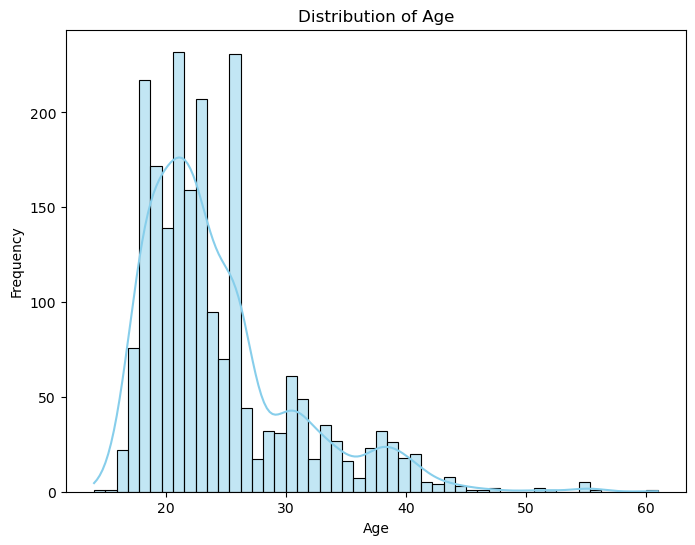

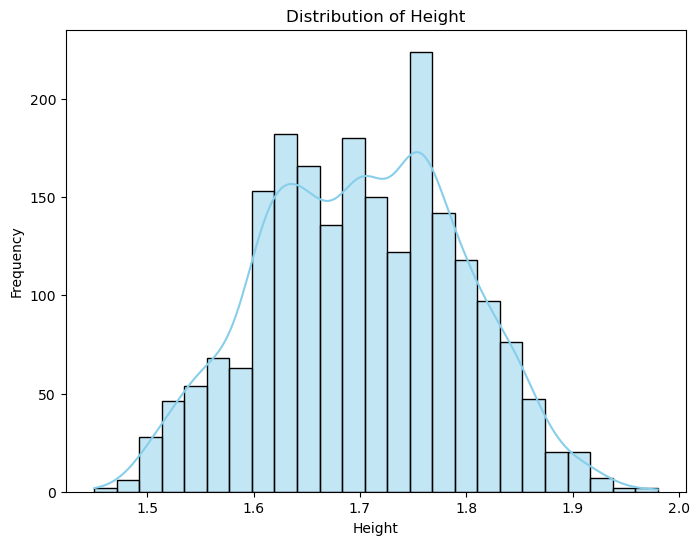

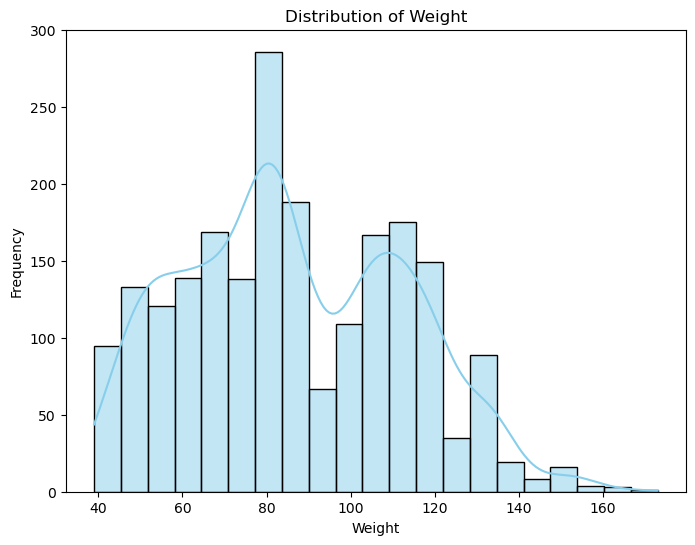

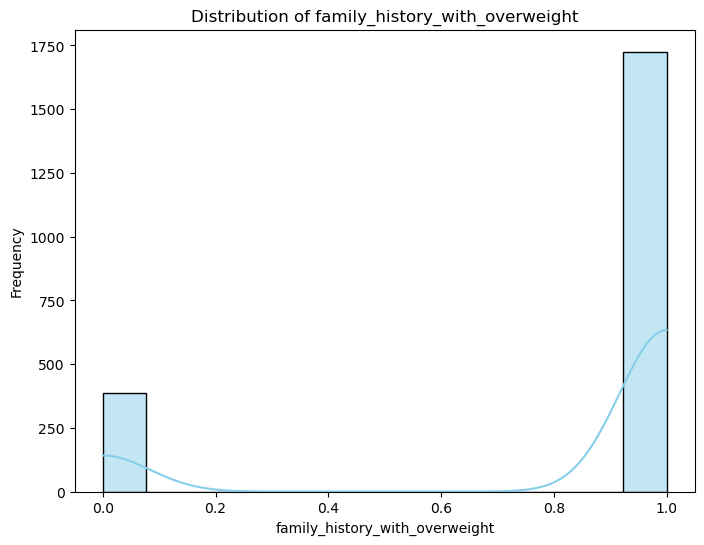

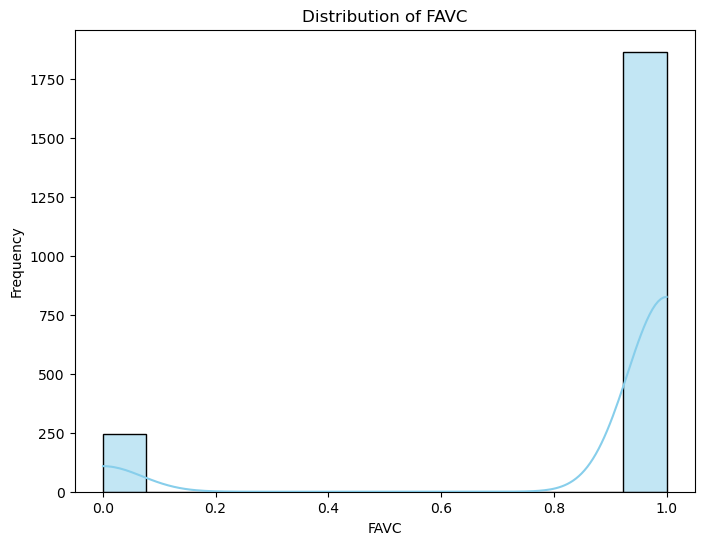

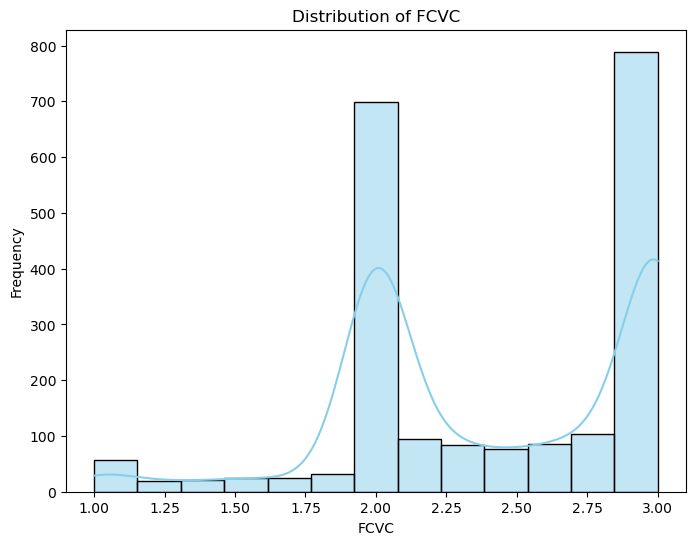

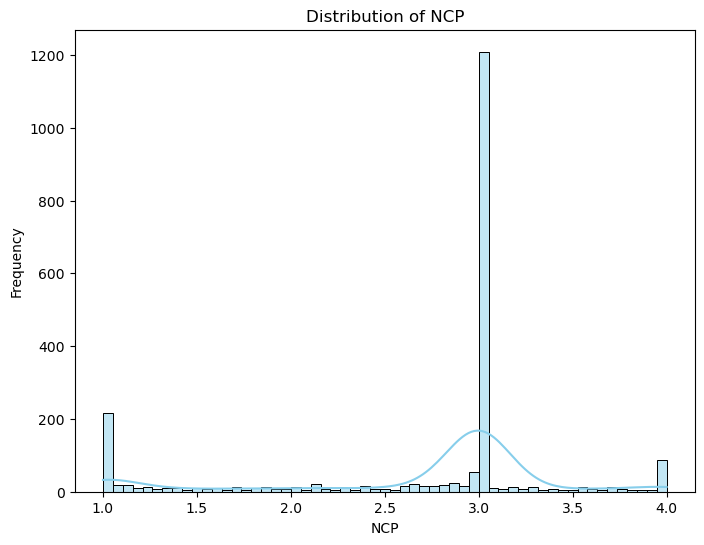

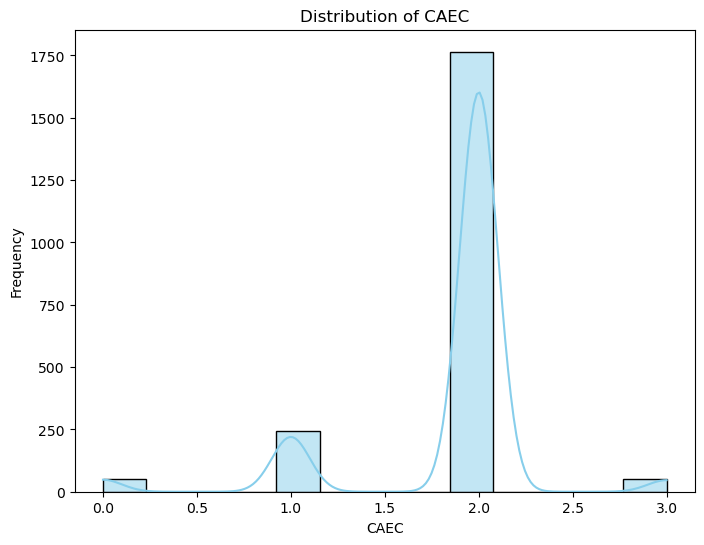

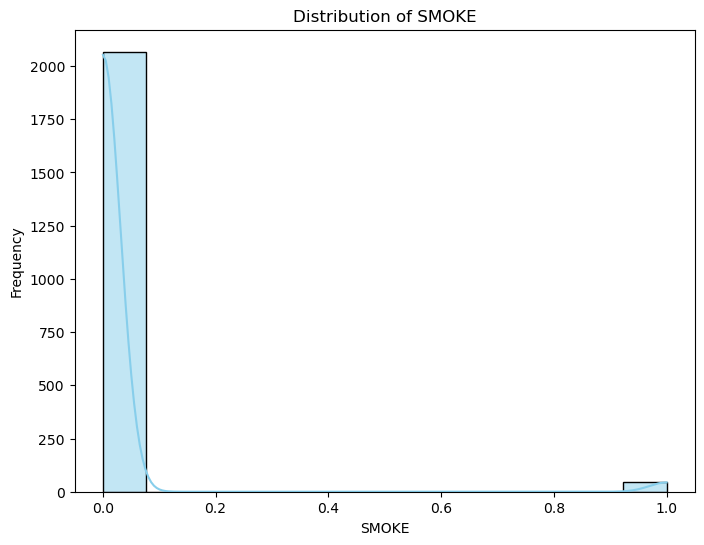

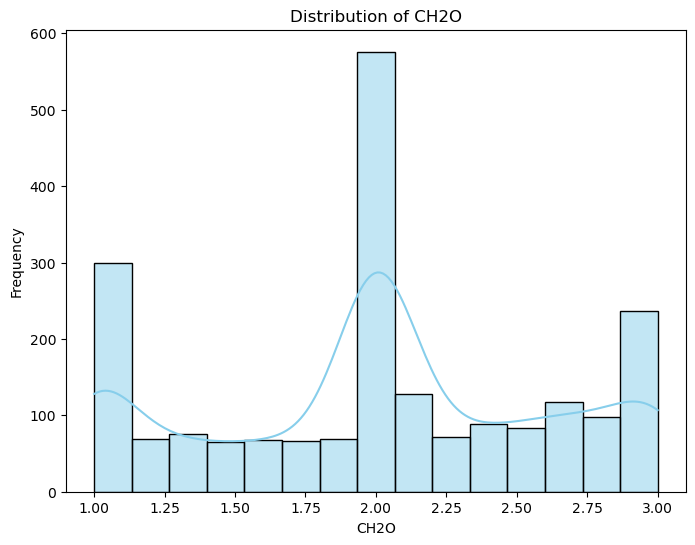

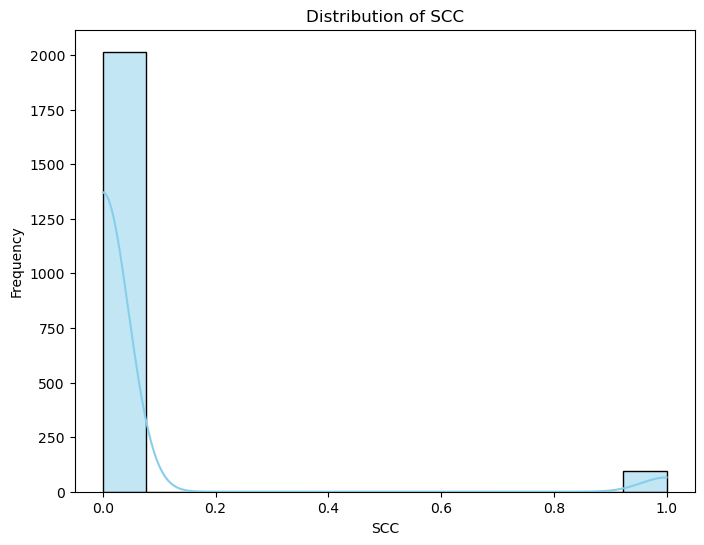

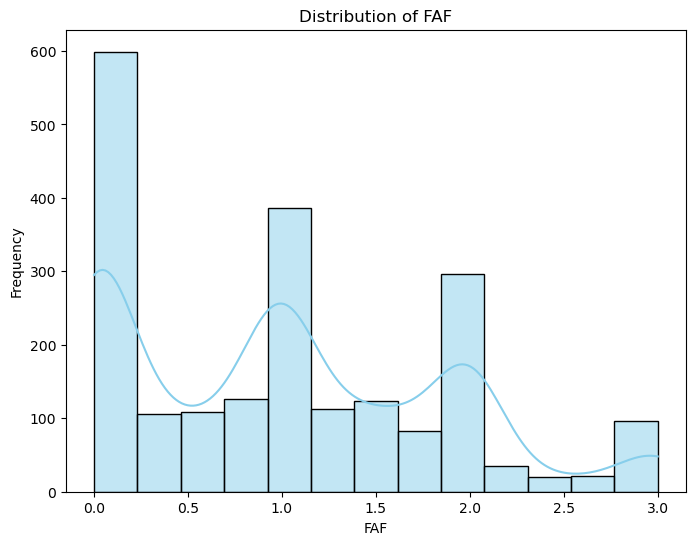

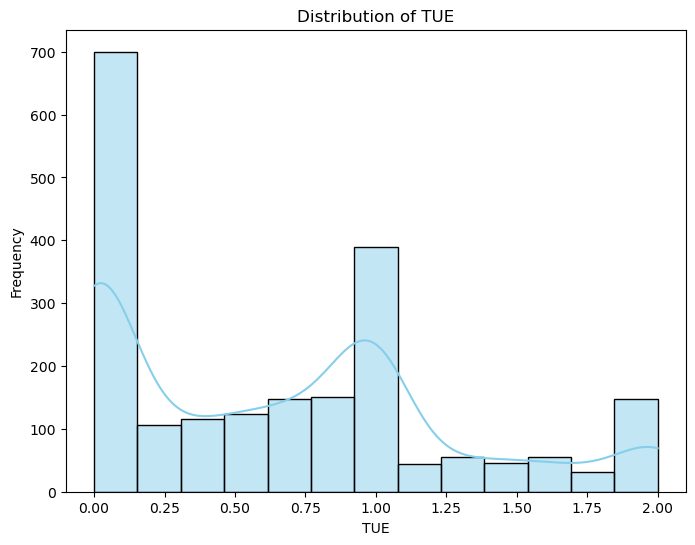

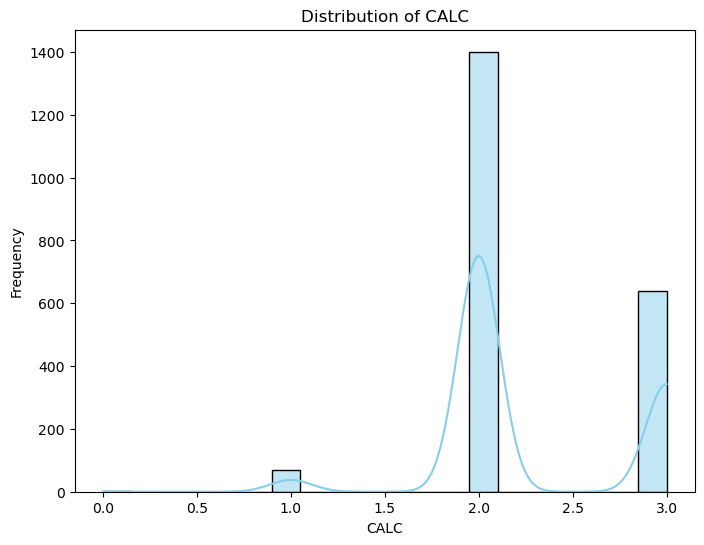

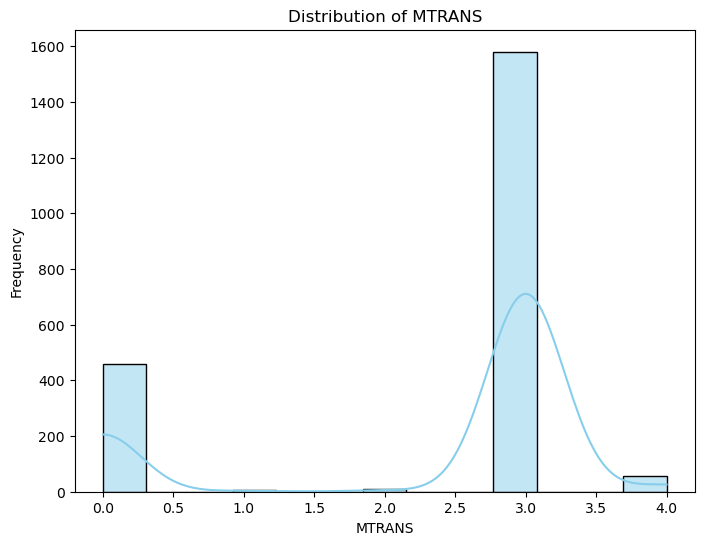

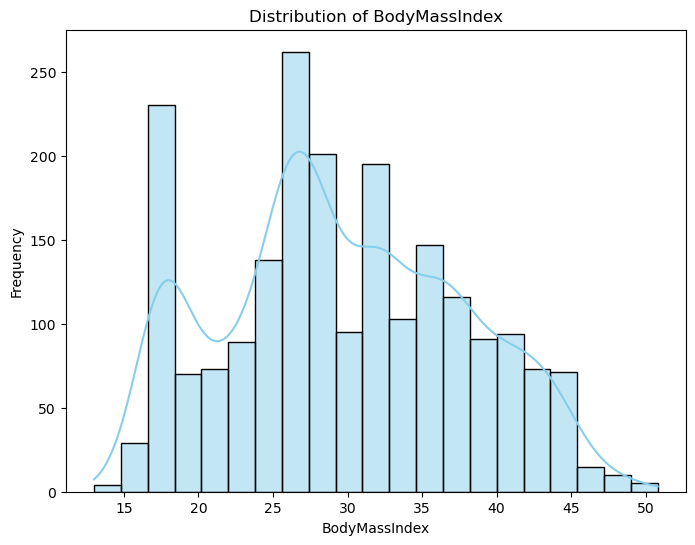

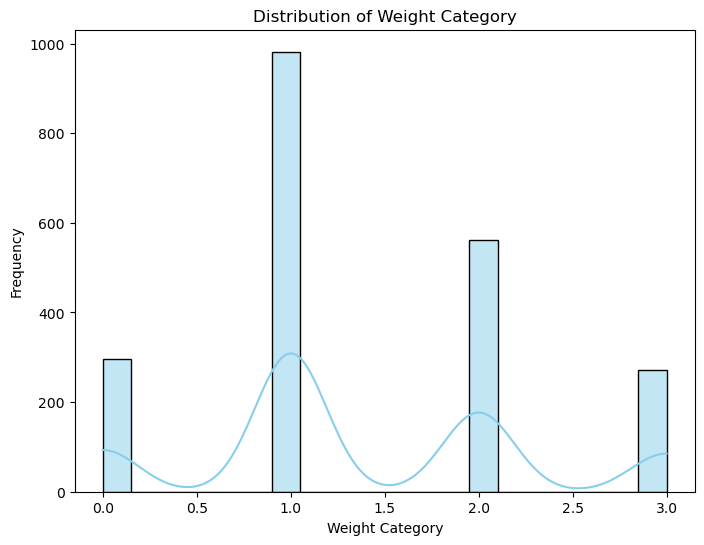

In [19]:
# Selecting specific columns of interest from the DataFrame 'df'
distributed_chart = df[['Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'BodyMassIndex', 'Weight Category']]

# Iterating through each selected column for visualization
for column in distributed_chart:
    # Creating a new figure with a specified size
    plt.figure(figsize=(8, 6))
    
    # Generating a histogram using seaborn's histplot function with a kernel density estimate (kde)
    sns.histplot(distributed_chart[column], kde=True, color='skyblue')
    
    # Adding title to the plot based on the current column
    plt.title(f'Distribution of {column}')
    
    # Labeling x-axis with the column name
    plt.xlabel(column)
    
    # Labeling y-axis as 'Frequency'
    plt.ylabel('Frequency')
    
    # Displaying the plot
    plt.show()


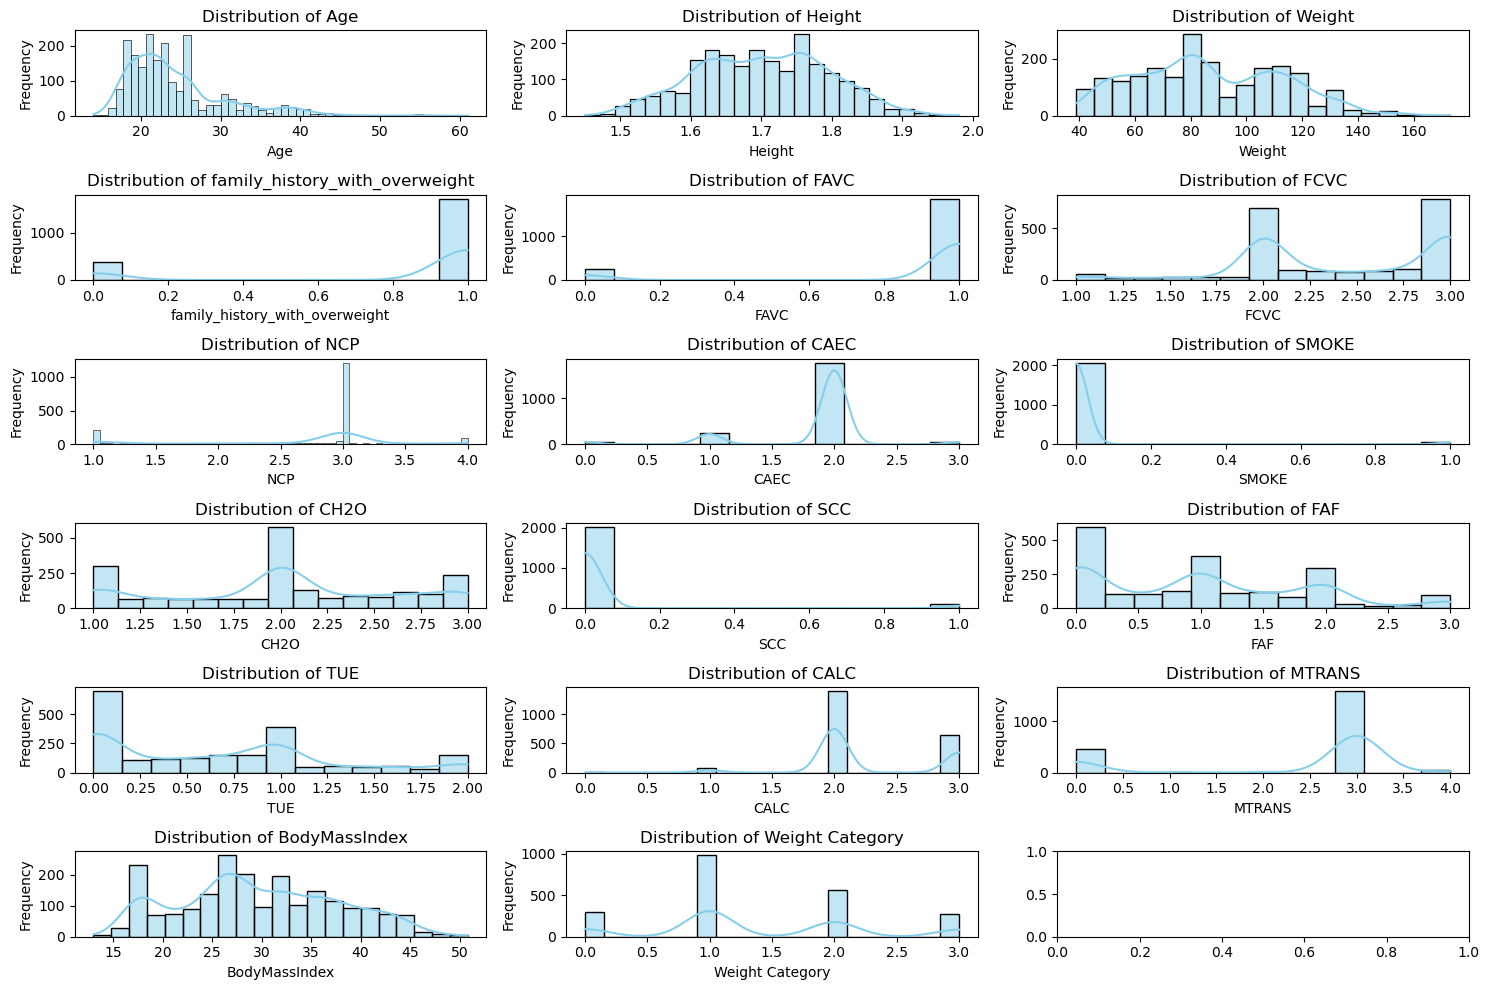

In [20]:
# Selecting specific columns from the DataFrame 'df' for Exploratory Data Analysis
distributed_chart = df[['Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'BodyMassIndex', 'Weight Category']]

# Setting the number of columns for subplots
num_columns = 3

# Calculating the number of rows required based on the number of columns and selected features
num_rows = (len(distributed_chart.columns) + num_columns - 1) // num_columns

# Creating subplots with the specified number of rows and columns
fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, 10))

# Reshaping the axes array if there is only one row
if num_rows == 1:
    axes = axes.reshape(1, -1)

# Looping through each selected column for plotting
for i, column in enumerate(distributed_chart.columns):
    # Calculating the row and column indices for the current subplot
    row_index = i // num_columns
    col_index = i % num_columns
    ax = axes[row_index, col_index]
    
    # Creating a histogram plot with a kernel density estimate (kde) for the current column
    sns.histplot(distributed_chart[column], kde=True, color='skyblue', ax=ax)
    
    # Setting title, x-axis label, and y-axis label for the current subplot
    ax.set_title(f'Distribution of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')

# Adjusting the layout to prevent overlapping of subplots
plt.tight_layout()

# Displaying the plot
plt.show()

C:\Users\USER PC\AppData\Local\Temp\ipykernel_16452\90010015.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


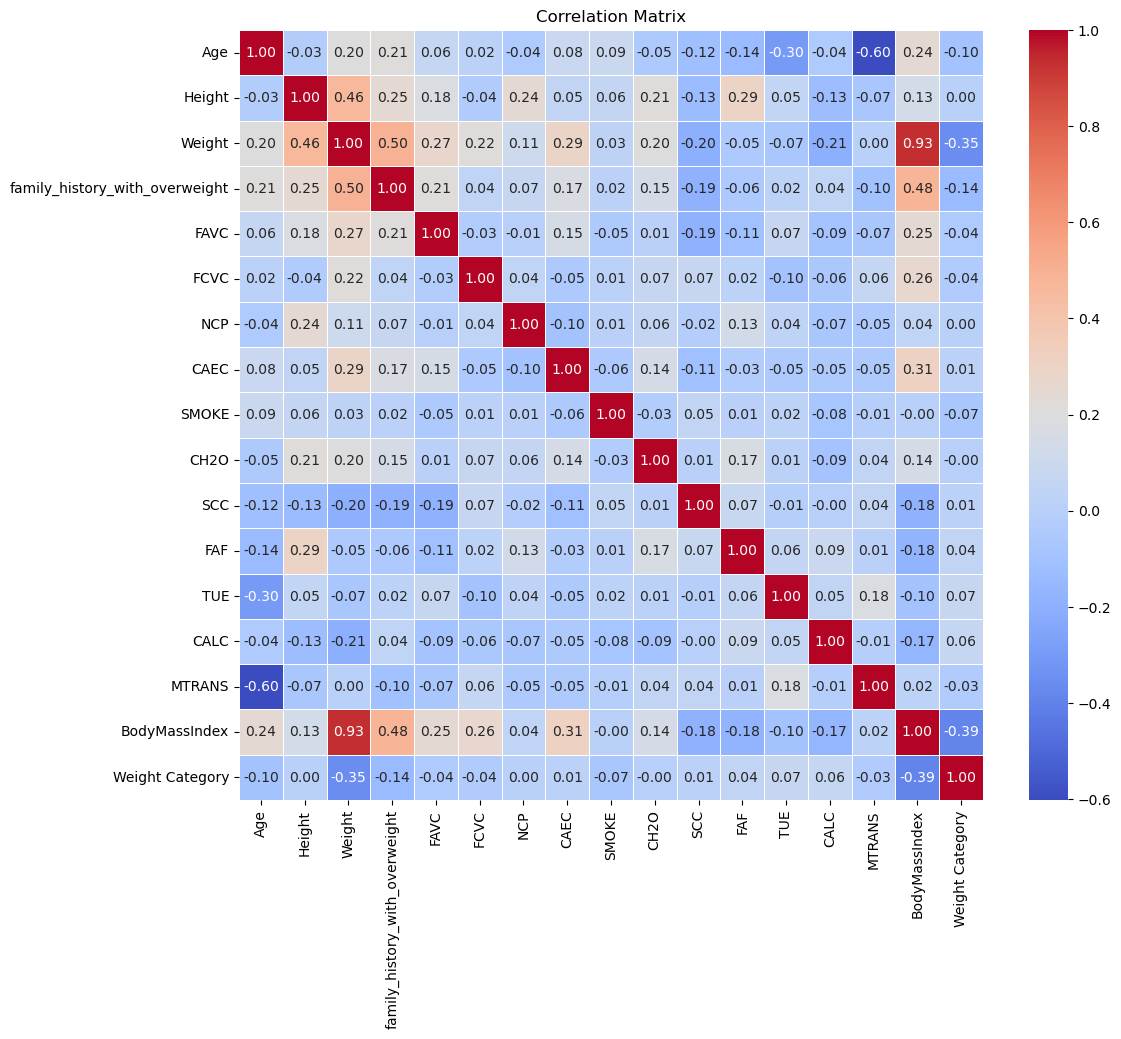

In [21]:
# Calculating the correlation matrix for the dataframe 'df'
correlation_matrix = df.corr()

# Setting up the plotting figure with a specified size
plt.figure(figsize=(12, 10))

# Create a heatmap using seaborn to visualize the correlation matrix
# - 'annot=True' displays the correlation values on the heatmap
# - 'cmap='coolwarm'' sets the color map for the heatmap
# - 'fmt=".2f"' formats the annotation values to display two decimal places
# - 'linewidths=0.5' adds a small gap between the cells in the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Setting the title of the plot
plt.title('Correlation Matrix')

# Displaying the heatmap
plt.show()

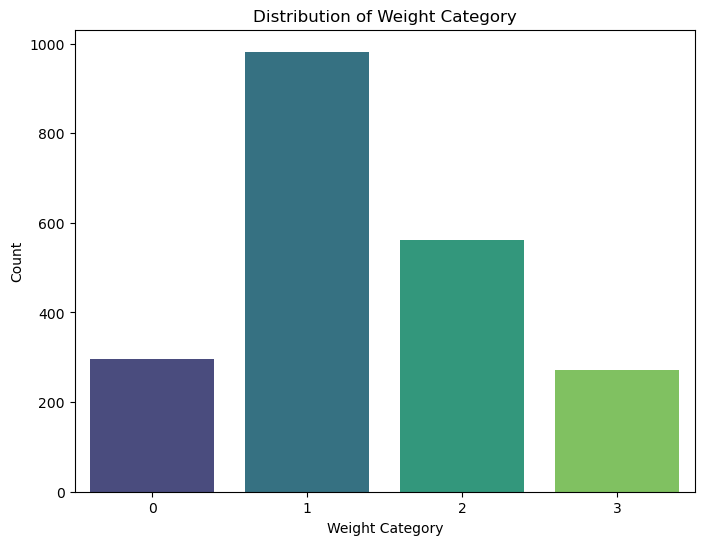

In [22]:
# Setting the target variable for EDA, in this case, it's 'Weight Category'
target_variable = 'Weight Category'

# Plotting the distribution of the target variable using seaborn
plt.figure(figsize=(8, 6))  # Setting the size of the plot
sns.countplot(data=df, x=target_variable, palette='viridis')  # Using seaborn's countplot to visualize the distribution
plt.title(f'Distribution of {target_variable}')  # Setting the title of the plot
plt.xlabel(target_variable)  # Labeling the x-axis with the target variable
plt.ylabel('Count')  # Labeling the y-axis with 'Count' representing the frequency
plt.show()  # Displaying the plot

| Feature                 | Categories                           |
|-------------------------|--------------------------------------|
| Weight Category         | Obese → 1, Overweight → 2, Normal → 0, Underweight → 3 |

# DATA SPLITTING

In [23]:
# Importing the train_test_split function from the scikit-learn library
from sklearn.model_selection import train_test_split

In [24]:
# List of columns to be dropped from the dataframe
columns_to_drop = ['Weight Category', 'Gender']

# Creating a new dataframe (X) by removing the specified columns
X = df.drop(columns=columns_to_drop)

# Creating a target variable (y) by selecting the 'Weight Category' column
y = df['Weight Category']

In [25]:
# Split the dataset into training and testing sets
# test_size=0.2 indicates that 20% of the data will be used for testing
# random_state=42 ensures reproducibility by fixing the random seed
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the training set features and target
print("Training set shape - Features:", X_train.shape, " Target:", y_train.shape)

# Print the shapes of the testing set features and target
print("Testing set shape - Features:", X_test.shape, " Target:", y_test.shape)


Training set shape - Features: (1688, 16)  Target: (1688,)
Testing set shape - Features: (423, 16)  Target: (423,)


# MODEL SELECTION
1. Model Training
2. Model Evaluation
3. Model Interpretation

In [26]:
# Importing necessary modules from scikit-learn for regression and classification tasks
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error, accuracy_score

In [27]:
# Linear Regression
linear_reg = LinearRegression()  # Create a linear regression model
linear_reg.fit(X_train, y_train)  # Train the model using the training data
linear_reg_pred = linear_reg.predict(X_test)  # Make predictions on the test data
linear_reg_mse = mean_squared_error(y_test, linear_reg_pred)  # Calculate Mean Squared Error
print("Linear Regression Mean Squared Error:", linear_reg_mse)

# Ridge Regression
ridge_reg = Ridge()  # Create a Ridge regression model
ridge_reg.fit(X_train, y_train)  # Train the model using the training data
ridge_reg_pred = ridge_reg.predict(X_test)  # Make predictions on the test data
ridge_reg_mse = mean_squared_error(y_test, ridge_reg_pred)  # Calculate Mean Squared Error
print("Ridge Regression Mean Squared Error:", ridge_reg_mse)

# Lasso Regression
lasso_reg = Lasso()  # Create a Lasso regression model
lasso_reg.fit(X_train, y_train)  # Train the model using the training data
lasso_reg_pred = lasso_reg.predict(X_test)  # Make predictions on the test data
lasso_reg_mse = mean_squared_error(y_test, lasso_reg_pred)  # Calculate Mean Squared Error
print("Lasso Regression Mean Squared Error:", lasso_reg_mse)

# Decision Tree Regression
decision_tree_reg = DecisionTreeRegressor()  # Create a decision tree regression model
decision_tree_reg.fit(X_train, y_train)  # Train the model using the training data
decision_tree_pred = decision_tree_reg.predict(X_test)  # Make predictions on the test data
decision_tree_mse = mean_squared_error(y_test, decision_tree_pred)  # Calculate Mean Squared Error
print("Decision Tree Regression Mean Squared Error:", decision_tree_mse)

# Random Forest Regression
random_forest_reg = RandomForestRegressor()  # Create a random forest regression model
random_forest_reg.fit(X_train, y_train)  # Train the model using the training data
random_forest_pred = random_forest_reg.predict(X_test)  # Make predictions on the test data
random_forest_mse = mean_squared_error(y_test, random_forest_pred)  # Calculate Mean Squared Error
print("Random Forest Regression Mean Squared Error:", random_forest_mse)

# Gradient Boosting Regression
gradient_boosting_reg = GradientBoostingRegressor()  # Create a gradient boosting regression model
gradient_boosting_reg.fit(X_train, y_train)  # Train the model using the training data
gradient_boosting_pred = gradient_boosting_reg.predict(X_test)  # Make predictions on the test data
gradient_boosting_mse = mean_squared_error(y_test, gradient_boosting_pred)  # Calculate Mean Squared Error
print("Gradient Boosting Regression Mean Squared Error:", gradient_boosting_mse)

# Support Vector Regression (SVR)
svr = SVR()  # Create a support vector regression model
svr.fit(X_train, y_train)  # Train the model using the training data
svr_pred = svr.predict(X_test)  # Make predictions on the test data
svr_mse = mean_squared_error(y_test, svr_pred)  # Calculate Mean Squared Error
print("SVR Mean Squared Error:", svr_mse)

Linear Regression Mean Squared Error: 0.6898629610492739
Ridge Regression Mean Squared Error: 0.6888723211579753
Lasso Regression Mean Squared Error: 0.7128243058969173
Decision Tree Regression Mean Squared Error: 0.0
Random Forest Regression Mean Squared Error: 0.00032978723404255314
Gradient Boosting Regression Mean Squared Error: 5.640530691869392e-10
SVR Mean Squared Error: 0.9332432869581587


In [28]:
MSE = {'Model': ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'Decision Tree Regression', 'Random Forest Regression', 'Gradient Boosting Regression', 'SVR'],
      'Mean Squared Error': [0.6898629610492739, 0.6888723211579753, 0.7128243058969173, 0.0, 0.0005468085106382978, 5.640530691869392e-10, 0.9332432869581587]}

# Creating a DataFrame named 'MSE_df' to organize and display the MSE values
MSE_df = pd.DataFrame(MSE)

# Displaying the first few rows of the DataFrame
MSE_df.head()


,Model,Mean Squared Error
0,Linear Regression,0.689863
1,Ridge Regression,0.688872
2,Lasso Regression,0.712824
3,Decision Tree Regression,0.000000
4,Random Forest Regression,0.000547


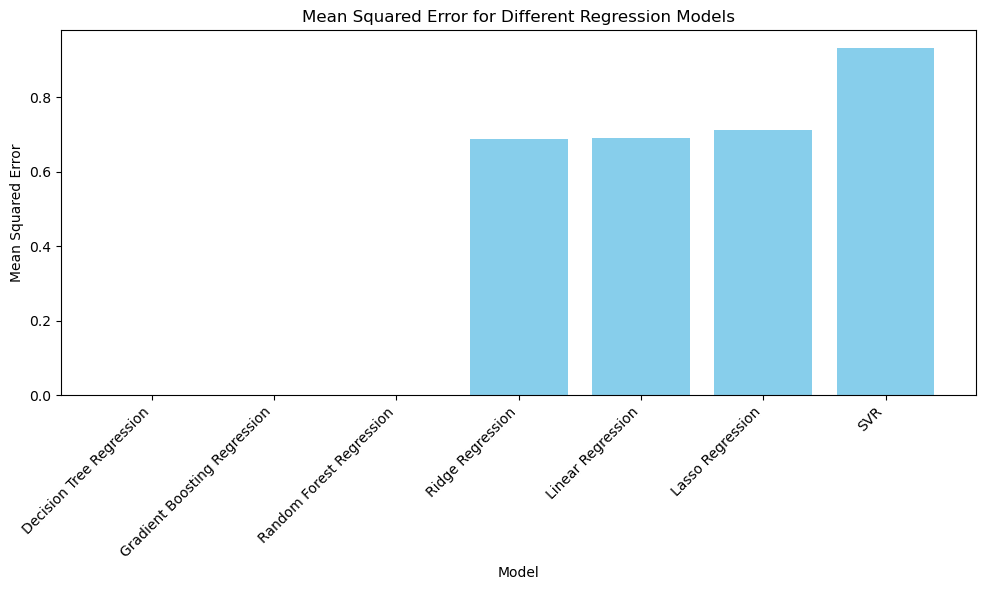

In [29]:
# Sorting the DataFrame 'MSE_df' based on the 'Mean Squared Error' column in ascending order
MSE_df_sorted = MSE_df.sort_values(by='Mean Squared Error', ascending=True)

# Plotting the bar chart
plt.figure(figsize=(10, 6))  # Setting the figure size for the plot
plt.bar(MSE_df_sorted['Model'], MSE_df_sorted['Mean Squared Error'], color='skyblue')  # Creating a bar chart with sorted data
plt.xlabel('Model')  # Setting the label for the x-axis
plt.ylabel('Mean Squared Error')  # Setting the label for the y-axis
plt.title('Mean Squared Error for Different Regression Models')  # Setting the title for the plot
plt.xticks(rotation=45, ha='right')  # Rotating x-axis labels for better readability
plt.tight_layout()  # Adjusting layout to prevent clipping of labels

# Showing the plot
plt.show()

In [30]:
# Importing the joblib library
#import joblib

# Saving the trained decision tree regression model to a file named 'decision_tree_model.joblib'
#joblib.dump(decision_tree_reg, 'decision_tree_model.joblib')


# CONCLUSION

## Interpretability
1. Decision Tree Regression: Achieved a perfect MSE of 0.0. Potential overfitting on training data, may not generalize well.
2. Random Forest Regression: Low MSE of 0.0007808510638297872. Ensemble method, addresses overfitting to some extent. Strong predictive performance.
3. Gradient Boosting Regression: Extremely low MSE of 5.640530691869392e-10, Ensemble method, builds trees sequentially, High predictive accuracy.
- Conclusion:
Decision Tree Regression's perfect MSE raises concerns about overfitting.
Both Random Forest Regression and Gradient Boosting Regression show very low MSE, indicating accurate predictions, so they can be used as the predicitve modelling.

- Choosing a model with the lowest mean squared error (MSE) as the best predictive model is based on the principle that a lower MSE indicates better predictive performance on the given data. The mean squared error is a measure of the average squared difference between the predicted values and the actual values. Therefore, a lower MSE suggests that the model's predictions are closer to the true values.

### Relationships
1. The correlation analysis reveals that there are positive associations among various factors, specifically, Consumption of alcohol (CALC), Calories consumption monitoring (SCC), Physical activity frequency (FAF), and Time using technology devices (TUE). Higher values in these activities tend to be closely related. This suggests that an increase in these activities is likely to have an impact on weight categories.
2. The positive relationships among these variables imply that as the consumption of alcohol, monitoring of calorie intake, frequency of physical activity, and time spent using technology devices increase, there is a tendency for weight to be affected.
3. It suggests that individuals engaging in higher levels of these activities may experience changes in their weight category.
4. Additional factors, such as dietary habits, genetics, and overall lifestyle, should be considered for a more comprehensive understanding of weight-related outcomes.


## Recommendations for Improving or Maintaining a Healthy Lifestyle:

1. Balanced Diet: Encourage individuals to maintain a balanced diet by incorporating a variety of foods, including vegetables and high-fiber options.
2. Monitor and reduce the frequent consumption of high-caloric foods (FAVC) and the consumption of food between meals (CAEC).
3. Hydration:Promote regular consumption of water daily (CH20) to ensure proper hydration, as it plays a crucial role in overall health.
4. Physical Activity: Emphasize the importance of regular physical activity by increasing the frequency of exercise (FAF). Consider personalized exercise plans based on individual preferences and fitness levels.
5. Technology Usage: Advocate for a balanced approach to time spent using technology devices (TUE). Encourage breaks and physical activities to offset sedentary behaviors.
6. Calories Monitoring: Promote awareness of calories consumption monitoring (SCC) to help individuals make informed decisions about their dietary choices.
7. Alcohol Consumption: Provide information about the potential impact of alcohol consumption (CALC) on weight. Encourage moderation and mindful drinking.
8. Weight Management: Implement programs to educate individuals about the different weight categories and the associated health risks. Provide resources for weight management and healthy lifestyle choices.
### Potential interventions or areas for further research
- To comprehensively address and mitigate obesity levels, a multifaceted approach is recommended. Longitudinal studies should be conducted to elucidate the long-term impact of lifestyle factors on obesity, offering insights for targeted interventions. Recognizing cultural and regional variations is crucial, necessitating tailored strategies to accommodate diverse lifestyles. Behavioral interventions should be implemented to foster healthier habits, emphasizing improved nutrition, increased physical activity, and reduced sedentary behavior. Community engagement ensures the cultural relevance and acceptance of interventions. The exploration of mobile applications and technology provides innovative avenues for delivering personalized interventions. Investigating the interplay between genetic factors and environmental influences is essential, considering the diverse backgrounds of the population. Additionally, examining psychosocial factors, advocating for supportive policies, involving healthcare providers, and launching public awareness campaigns contribute to a comprehensive strategy for combating obesity, highlighting the importance of preventive measures through healthy lifestyle choices.

## Limitations and Considerations
1. Sampling Bias: The data was collected through a web platform, which may introduce sampling bias as it relies on individuals who have internet access and are willing to participate in an online survey. This may not be representative of the entire population, particularly those who are not internet-savvy or choose not to engage in online surveys.
2. Self-Reporting Bias: The survey relies on self-reported information, which may be subject to biases such as social desirability bias or recall bias. Individuals may underreport certain behaviors (e.g., high-caloric food consumption) or overreport others, impacting the accuracy of the data.
3. Demographic Representation: The age range of 14 to 61 may not cover the entire population, potentially excluding certain age groups. Additionally, the data is specific to Mexico, Peru, and Colombia, limiting the generalizability of findings to a broader global or regional context.
4. Model Constraints: The analysis may be limited by the choice of statistical models or methods employed. If the chosen models are not well-suited for the characteristics of the data, the results may not accurately reflect the underlying relationships.
5. Health Information Limitations: The BMI-based classification of obesity may not capture all aspects of health. Other health indicators or conditions that contribute to obesity-related risks (e.g., metabolic health, fitness levels) are not considered in this analysis.


- Obesity is a well-established risk factor for cardiovascular diseases (CVD). There is a strong correlation between obesity and the development of various cardiovascular conditions. The relationship between obesity and cardiovascular diseases is complex and involves multiple mechanisms. Obesed patients are asociated with
1. Increased Risk of Hypertension (High Blood Pressure): Obesity is often associated with elevated blood pressure. Hypertension is a significant risk factor for various cardiovascular diseases, including heart attacks and strokes.
2. Dyslipidemia: Obesity is commonly linked to abnormalities in lipid metabolism, such as high levels of triglycerides and low levels of high-density lipoprotein (HDL) cholesterol. Dyslipidemia is a major contributor to atherosclerosis, a condition where arteries become narrowed and hardened, leading to an increased risk of heart disease.
3. Insulin Resistance and Diabetes: Obesity is closely associated with insulin resistance and the development of type 2 diabetes. Diabetes is a major risk factor for cardiovascular diseases, including coronary artery disease.
4. Inflammation: Adipose tissue (fat cells) can produce inflammatory substances. Chronic low-grade inflammation is associated with the development and progression of atherosclerosis, which is a key component of cardiovascular diseases.
5. Obstructive Sleep Apnea (OSA): Obesity is a significant risk factor for OSA, a condition characterized by interruptions in breathing during sleep. OSA has been linked to an increased risk of hypertension and other cardiovascular problems.
6. Physical Inactivity: Obesity is often associated with a sedentary lifestyle, which itself is a risk factor for cardiovascular diseases. Lack of physical activity can contribute to the development of obesity and exacerbate other cardiovascular risk factors.
7. Central Obesity: The distribution of fat, especially abdominal or central obesity, is particularly associated with an increased risk of cardiovascular diseases.

8. Hormonal Changes: Obesity can lead to hormonal changes, including an increase in leptin (associated with appetite regulation) and a decrease in adiponectin (which has anti-inflammatory and insulin-sensitizing effects). These changes can contribute to cardiovascular risk.
- It's important to note that while obesity is a significant risk factor, other factors such as genetics, smoking, and age also play roles in the development of cardiovascular diseases. Additionally, addressing obesity through lifestyle modifications, including a healthy diet and regular physical activity, can help reduce the associated cardiovascular risks. Individuals who are concerned about their cardiovascular health should consult with healthcare professionals for personalized advice and management.